<a href="https://colab.research.google.com/github/Sandeep354/Fraud-Credit-Cards/blob/main/Credit_Card_Fraud_SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Self-Organizing-Maps (Unsupervised Deep Learning)

## **Find Fraudulent customers**

In [95]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
# Importing the dataset
dataset = pd.read_csv("Credit_Card_Applications.csv")

In [97]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [98]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [99]:
X.shape, y.shape

((690, 15), (690,))

### Here, we dont use `y`. Instead, SOM will detect via X itself (because we are dealing with `UNSUPERVISED-LEARNING`). And y is just to see how much of it is predicted correctly in the end.

In [100]:
# Feature-Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

Get minisom.py from this link - https://github.com/JustGlowing/minisom/blob/master/minisom.py

In [101]:
# Training the SOM

# We will use minisom.py or install it --> developed by some developer
from minisom import MiniSom

In [102]:
# x,y --> grid shape
# input_len --> no.of features in the X dataset
# sigma --> radius of different neighbourhoods in the grid
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)

In [103]:
som.topology

'rectangular'

In [104]:
# Initialize the weights (STEP 3)
som.random_weights_init(data=X)

# Train the som on X (STEP 4 to STEP 9) (we will do step 4 - 9 100 times)
som.train_random(data=X, num_iteration=100)

**Following codes have to be combined together in 1 cell to get the correct graph**

In [105]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show

In [106]:
# Initialize the figure
bone()

<Figure size 432x288 with 0 Axes>

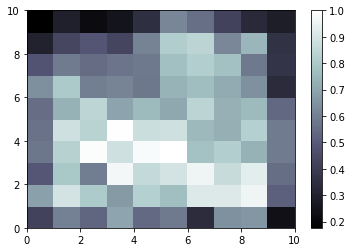

In [107]:
# distance_map returns Mean InterNeuron Distances in matrix representation
pcolor(som.distance_map().T)
colorbar()

In [108]:
markers = ['o', 's'] # o-circle, s-square
color = ['r', 'g'] # r-red, g-green

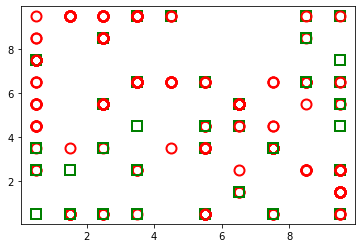

In [109]:
# i - diff. value of all the index of customer database (0-689)
# x - diff vectors
for i, x in enumerate(X):
  # Get the winning node for the 1st customer
  w = som.winner(x=x)
  # on this winning node, place the colored marker (+0.5 to put marker on the centre of the winning node)
  plot(w[0] + 0.5,
       w[1] + 0.5,
       markers[y[i]],
       markeredgecolor = color[y[i]],
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth = 2)
  
show()

**Put all the code together in one cell**

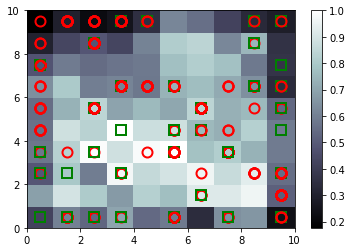

In [110]:
bone()
pcolor(som.distance_map().T)
colorbar()

markers = ['o', 's'] # o-circle, s-square
color = ['r', 'g'] # r-red, g-green

for i, x in enumerate(X):
  # Get the winning node for the 1st customer
  w = som.winner(x=x)
  # on this winning node, place the colored marker (+0.5 to put marker on the centre of the winning node)
  plot(w[0] + 0.5,
       w[1] + 0.5,
       markers[y[i]],
       markeredgecolor = color[y[i]],
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth = 2)
  
show()

In [120]:
# Finding the frauds
mappings = som.win_map(data=X)

In [130]:
mappings[(2,3)]

[array([0.75232352, 1.        , 0.19548872, 0.04017857, 0.5       ,
        1.        , 0.875     , 0.04385965, 1.        , 0.        ,
        0.        , 0.        , 0.5       , 0.        , 0.05298   ]),
 array([0.80274618, 0.        , 0.16165414, 0.01785714, 0.5       ,
        0.76923077, 0.875     , 0.05263158, 1.        , 0.        ,
        0.        , 0.        , 0.5       , 0.14      , 0.00824   ]),
 array([0.92713301, 1.        , 0.14541353, 0.02089286, 0.5       ,
        0.53846154, 0.875     , 0.00298246, 1.        , 0.        ,
        0.        , 0.        , 0.5       , 0.09      , 0.        ]),
 array([0.82735685, 0.        , 0.21548872, 0.53571429, 0.        ,
        0.69230769, 1.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.5       , 0.        , 0.13212   ]),
 array([0.6764733 , 0.        , 0.40721805, 0.35714286, 0.5       ,
        0.76923077, 0.875     , 0.06140351, 1.        , 0.        ,
        0.        , 0.        , 0.5     

In [131]:
# Get the winning node coordinates (fraudulent)
# Take the cordinates from the map (7,3), (3,3), (2,3)
frauds = np.concatenate((mappings[(7,3)], mappings[(2,3)]), axis=0)
frauds = sc.inverse_transform(frauds)

In [132]:
frauds

array([[1.5767264e+07, 1.0000000e+00, 7.4830000e+01, 1.9000000e+01,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 4.0000000e-02,
        0.0000000e+00, 1.0000000e+00, 2.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 3.5200000e+02],
       [1.5704581e+07, 1.0000000e+00, 2.3750000e+01, 4.1500000e-01,
        1.0000000e+00, 8.0000000e+00, 4.0000000e+00, 4.0000000e-02,
        0.0000000e+00, 1.0000000e+00, 2.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.2800000e+02, 7.0000000e+00],
       [1.5761854e+07, 1.0000000e+00, 3.1250000e+01, 2.8350000e+00,
        2.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 5.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.7600000e+02, 1.4700000e+02],
       [1.5725776e+07, 1.0000000e+00, 2.3080000e+01, 0.0000000e+00,
        2.0000000e+00, 4.0000000e+00, 4.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 1.1000000e+01, 0.0000000e+00,
        1.0000000e+00,